In [13]:
#importing necessary libraries
import mlxtend
import pandas as pd
from mlxtend.frequent_patterns import apriori,association_rules
from mlxtend.preprocessing import TransactionEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
#Defining necessary function for the association rules
def rules(df,confidence,support):
    ap = {}
    for i in confidence:
        frequent_itemsets =apriori(df,min_support=support,use_colnames=True)
        rule = association_rules(frequent_itemsets,min_threshold=i)
        ap[i] = len(rule.antecedents) #will show the number of rules
    return pd.Series(ap).to_frame("Support: %s"%support)

## Apriori Algorithm:

* The Apriori Algorithm, used for the first phase of the Association Rules, is the most popular and classical algorithm in the frequent old parts. These algorithm properties and data are evaluated with Boolean Association Rules. In this algorithm, there are product clusters that pass frequently, and then strong relationships between these products and other products are sought.

* The importance of an Association Rules can be determined by 3 parameters that are used to identify the strength of the algorithm. Namely,

1. Support
2. Confidence
3. Lift
Let X and Y represent the products in the market and N represents the total number of products.

>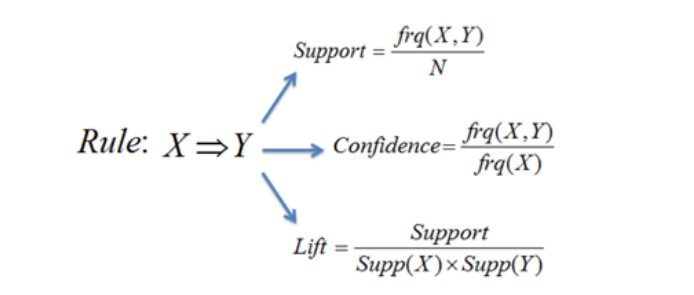

Support : It is the probability of an event to occur.

Confidence : It is a measure of conditional probability

Lift : It is the probability of all items occurring together divided by the product of antecedent and consequent occurring as if they are independent of each other.

# Data - books

In [3]:
#importing the dataset
df1 = pd.read_csv("C:\\Users\\Shivani Bhavsar\\OneDrive\\Documents\\ExcelR Assignment files\\DS\\A9 Association\\book.csv")
df1

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1995,0,0,1,0,0,1,1,1,0,1,1
1996,0,0,0,0,0,0,0,0,0,0,0
1997,0,0,0,0,0,0,0,0,0,0,0
1998,0,0,1,0,0,0,0,0,0,0,0


## Problem Statement:
Prepare rules for the all the data sets :

* 1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
* 2) Change the minimum length in apriori algorithm
* 3) Visulize the obtained rules using different plots 


In [4]:
#basic information about the data
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


The data contains 2000 transactions containing 11 different categories of books. There are no null values in the dataset

In [5]:
#defining different values of support and confidence
support1 = [0.001,0.005,0.01,0.05,0.1]
confidence1 = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [6]:
# finding the number of rules for the different values of support and confidence
confs1 = []
for i in support1:
    ap_i1 = rules(df1,confidence=confidence1,support=i)
    confs1.append(ap_i1)

In [7]:
all_conf1 = pd.concat(confs1,axis=1)
all_conf1

,Support: 0.001,Support: 0.005,Support: 0.01,Support: 0.05,Support: 0.1
0.1,110800,26603,9079,662,100
0.2,75765,20533,7156,599,100
0.3,54271,15735,5532,478,89
0.4,41693,11771,4285,371,70
0.5,32173,8981,3272,260,49
0.6,21440,5582,2179,135,30
0.7,12983,3818,1459,87,19
0.8,9918,2750,1004,62,6
0.9,7409,1657,563,10,1


Text(0.5, 0, 'Confidence')

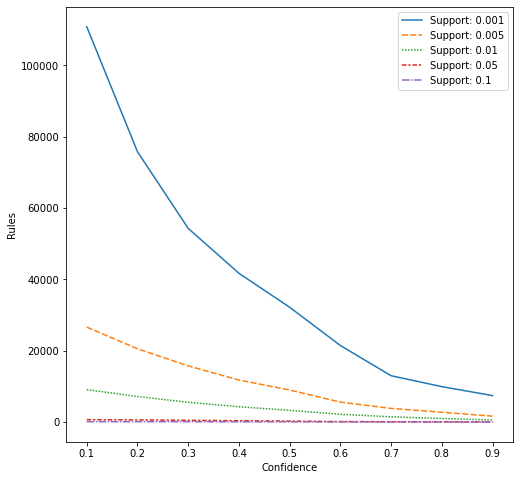

In [8]:
#visualizing the number of rules for different values of support and confidence
plt.figure(figsize=(8,8))
sns.lineplot(data=all_conf1)
plt.ylabel('Rules')
plt.xlabel('Confidence')

### Conclusion:

As seen in the plot, the number of rules decreases as the value of support and confidence increases

## Creating the association rule for a specific value of support and confidence

Lets try with Support 0.01 and Confidence at 0.9

In [9]:
freq_items_final1 =  apriori(df1, min_support=0.01, use_colnames=True)
freq_items_final1

,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
589,0.0125,"(ItalAtlas, CookBks, ArtBks, ItalArt, ItalCook..."
590,0.0145,"(GeogBks, DoItYBks, ChildBks, CookBks, ArtBks,..."
591,0.0105,"(DoItYBks, ChildBks, CookBks, ArtBks, ItalArt,..."
592,0.0100,"(RefBks, ChildBks, CookBks, ArtBks, ItalArt, I..."


In [10]:
rules_final1 = association_rules(freq_items_final1,min_threshold=0.9,support_only=False)
rules_final1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
1,(ItalAtlas),(RefBks),0.0370,0.2145,0.0370,1.000000,4.662005,0.029063,inf
2,(ItalArt),(ArtBks),0.0485,0.2410,0.0485,1.000000,4.149378,0.036812,inf
3,"(ItalCook, ChildBks)",(CookBks),0.0850,0.4310,0.0850,1.000000,2.320186,0.048365,inf
4,"(ItalAtlas, ChildBks)",(RefBks),0.0285,0.2145,0.0285,1.000000,4.662005,0.022387,inf
...,...,...,...,...,...,...,...,...,...
558,"(ItalAtlas, ChildBks, ArtBks, ItalCook, RefBks)","(CookBks, ItalArt)",0.0115,0.0410,0.0110,0.956522,23.329799,0.010528,22.0570
559,"(ItalAtlas, ChildBks, ItalArt, ItalCook, RefBks)","(CookBks, ArtBks)",0.0110,0.1670,0.0110,1.000000,5.988024,0.009163,inf
560,"(ItalAtlas, ItalArt, CookBks, ChildBks)","(ItalCook, ArtBks, RefBks)",0.0115,0.0235,0.0110,0.956522,40.703053,0.010730,22.4595
561,"(ItalAtlas, ItalCook, ArtBks, ChildBks)","(CookBks, ItalArt, RefBks)",0.0115,0.0165,0.0110,0.956522,57.971014,0.010810,22.6205


In [11]:
# top 20 assosiations as per the specified value of support and confidence
rules_final1.sort_values("lift", ascending=True)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
274,"(ItalArt, DoItYBks, YouthBks, ArtBks)",(CookBks),0.0150,0.431,0.0135,0.900000,2.088167,0.007035,5.690000
370,"(GeogBks, DoItYBks, ChildBks, YouthBks, RefBks)",(CookBks),0.0300,0.431,0.0270,0.900000,2.088167,0.014070,5.690000
10,"(ItalArt, DoItYBks)",(CookBks),0.0300,0.431,0.0270,0.900000,2.088167,0.014070,5.690000
91,"(ItalArt, ArtBks, DoItYBks)",(CookBks),0.0300,0.431,0.0270,0.900000,2.088167,0.014070,5.690000
71,"(ItalArt, YouthBks, DoItYBks)",(CookBks),0.0150,0.431,0.0135,0.900000,2.088167,0.007035,5.690000
153,"(DoItYBks, YouthBks, GeogBks, ChildBks)",(CookBks),0.0565,0.431,0.0510,0.902655,2.094327,0.026648,5.845182
531,"(DoItYBks, RefBks, ChildBks, ArtBks, YouthBks,...",(CookBks),0.0160,0.431,0.0145,0.906250,2.102668,0.007604,6.069333
191,"(ItalArt, DoItYBks, ArtBks, ChildBks)",(CookBks),0.0220,0.431,0.0200,0.909091,2.109260,0.010518,6.259000
395,"(ChildBks, YouthBks, ArtBks, ItalArt, GeogBks)",(CookBks),0.0110,0.431,0.0100,0.909091,2.109260,0.005259,6.259000
42,"(ItalArt, DoItYBks, ChildBks)",(CookBks),0.0220,0.431,0.0200,0.909091,2.109260,0.010518,6.259000


In [15]:
fig = px.scatter(x =rules_final1["support"], y=rules_final1["confidence"])
fig.show()

# Data - my_movies

In [16]:
#importing the dataset
df = pd.read_csv("C:\\Users\\Shivani Bhavsar\\OneDrive\\Documents\\ExcelR Assignment files\\DS\\A9 Association\\my_movies.csv")
df

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [17]:
df2 = df.iloc[:,5:]
df2

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [18]:
#basic information about the data
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Sixth Sense    10 non-null     int64
 1   Gladiator      10 non-null     int64
 2   LOTR1          10 non-null     int64
 3   Harry Potter1  10 non-null     int64
 4   Patriot        10 non-null     int64
 5   LOTR2          10 non-null     int64
 6   Harry Potter2  10 non-null     int64
 7   LOTR           10 non-null     int64
 8   Braveheart     10 non-null     int64
 9   Green Mile     10 non-null     int64
dtypes: int64(10)
memory usage: 928.0 bytes


The data contains 10 entries containing 10 different movies. There are no null values in the dataset

In [19]:
#defining different values of support and confidence
support2 = [0.001,0.005,0.01,0.05,0.1]
confidence2 = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [20]:
# finding the number of rules for the different values of support and confidence
confs2 = []
for i in support2:
    ap_i2 = rules(df2,confidence=confidence2,support=i)
    confs2.append(ap_i2)

In [21]:
all_conf2 = pd.concat(confs2,axis=1)
all_conf2

,Support: 0.001,Support: 0.005,Support: 0.01,Support: 0.05,Support: 0.1
0.1,250,250,250,250,250
0.2,220,220,220,220,220
0.3,217,217,217,217,217
0.4,216,216,216,216,216
0.5,216,216,216,216,216
0.6,134,134,134,134,134
0.7,129,129,129,129,129
0.8,128,128,128,128,128
0.9,125,125,125,125,125


Text(0.5, 0, 'Confidence')

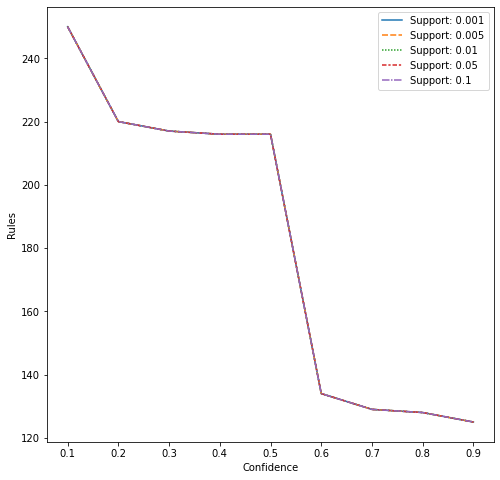

In [22]:
#visualizing the number of rules for different values of support and confidence
plt.figure(figsize=(8,8))
sns.lineplot(data=all_conf2)
plt.ylabel('Rules')
plt.xlabel('Confidence')

### Conclusion:

As seen in the plot, the number of rules decreases as the value of confidence increases and it remains same with all the values of support.

## Creating the association rule for a specific value of support and confidence

Lets try with Support 0.01 and Confidence at 0.9

In [23]:
freq_items_final2 =  apriori(df2, min_support=0.01, use_colnames=True)
freq_items_final2

,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.1,(Harry Potter2)
7,0.1,(LOTR)
8,0.1,(Braveheart)
9,0.2,(Green Mile)


In [24]:
rules_final2 = association_rules(freq_items_final2,min_threshold=0.9,support_only=False)
rules_final2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
1,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.0,1.666667,0.08,inf
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
3,(LOTR),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
4,(Braveheart),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
...,...,...,...,...,...,...,...,...,...
120,"(Harry Potter1, Green Mile)","(Sixth Sense, LOTR1, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
121,"(LOTR2, Green Mile)","(Harry Potter1, Sixth Sense, LOTR1)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
122,"(LOTR1, Green Mile)","(Harry Potter1, Sixth Sense, LOTR2)",0.1,0.1,0.1,1.0,10.000000,0.09,inf
123,"(Harry Potter1, LOTR2)","(Sixth Sense, LOTR1, Green Mile)",0.1,0.1,0.1,1.0,10.000000,0.09,inf


In [25]:
rules_final2.sort_values("lift", ascending=True)[0:20]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
52,"(Green Mile, Sixth Sense, LOTR)",(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
2,(Patriot),(Gladiator),0.6,0.7,0.6,1.0,1.428571,0.18,inf
3,(LOTR),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
4,(Braveheart),(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
37,"(Green Mile, LOTR)",(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
10,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.0,1.428571,0.12,inf
33,"(Patriot, Braveheart)",(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
12,"(Sixth Sense, LOTR)",(Gladiator),0.1,0.7,0.1,1.0,1.428571,0.03,inf
0,(LOTR),(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf
28,"(LOTR2, Green Mile)",(Sixth Sense),0.1,0.6,0.1,1.0,1.666667,0.04,inf


array([[<AxesSubplot:title={'center':'support'}>,
        <AxesSubplot:title={'center':'confidence'}>]], dtype=object)

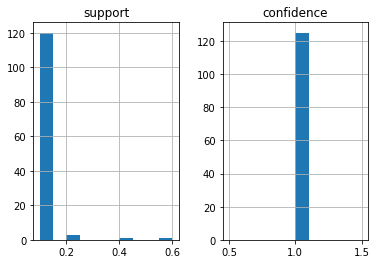

In [26]:
# top 20 assosiations as per the specified value of support and confidence
rules_final2[["support","confidence"]].hist()